In [27]:
import pandas as pd
import torch
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./HW2 附件/HW2_house-prices.csv')

In [24]:
def turn_into_encoding(word, ll):
    return ll.index(word)

print(turn_into_encoding('jj', ['aa','jj']))

# turn non-numeric number into encoding (need one hot)
test_df = df.copy()
for ii in test_df.columns:
    if not (test_df[ii].dtype == int or test_df[ii].dtype == float):
        test_df[ii] = test_df[ii].apply(turn_into_encoding, ll = list(set(test_df[ii])))

# fill 0 to empty box
test_df = test_df.fillna(0)

# splitting features and labels
x_data = test_df.drop(columns=['SalePrice'])
y_data = test_df['SalePrice']
print(x_data.shape, y_data.shape)


1
(1460, 80) (1460,)


In [26]:
# Split the data into training, testing sets and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(x_data, y_data, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also access the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 1990658526.1642017
R-squared: 0.7886153572702378
Coefficients: [-4.43450330e+00 -1.33968151e+02 -2.13540670e+03 -3.38102556e+01
  6.27290300e-01 -4.24707955e+04 -4.66971020e+03 -2.54400554e+03
  1.23479956e+03 -7.24592153e+04 -9.13791094e+02  1.85393451e+04
 -3.11327008e+02 -3.01966358e+03 -1.69409898e+03 -1.91183151e+02
 -9.58004236e+02  1.76126148e+04  3.52048231e+03  1.73213927e+02
  1.30590845e+02  4.65350219e+03 -5.38709881e+03 -4.44444891e+02
  3.38369593e+02  2.75369072e+03  2.44624837e+01 -6.49345889e+02
 -1.08885082e+03  2.42466374e+03  1.14993551e+03  2.20832404e+03
 -1.26728065e+03  1.06961244e+03  3.87154770e+00 -3.81701742e+02
 -4.01142105e+00 -1.80929226e-01 -3.20802579e-01 -2.92933509e+03
 -2.70893748e+03 -5.16214828e+03 -2.76475116e+03  3.47530184e+00
  4.95266859e+00  2.16780003e+01  3.01059707e+01  1.21237336e+04
  1.34789147e+03  4.26239195e+03  5.76327337e+02 -9.35603301e+03
 -1.21364291e+04  4.19809488e+03  5.48629211e+03 -3.77042159e+03
  1.641

In [31]:
print(x_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

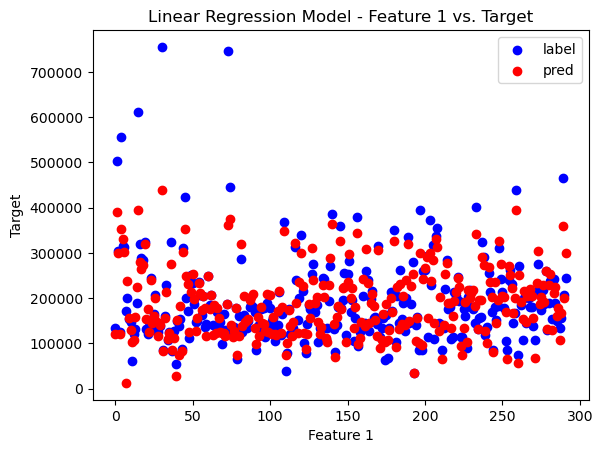

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Scatter plot of the data points
# plt.scatter(y_test, y_pred, label='Data Points',)
plt.scatter(range(y_test.shape[0]),y_test,  c='blue', label='label')
plt.scatter(range(y_pred.shape[0]),y_pred,  c='red', label='pred')
# plt.scatter(female['Height'], female['Weight'], c='red', label='female')
# Plot the linear regression line
# plt.plot(X_train[:, 0], y_pred, color='red', linewidth=2, label='Linear Regression Line')

# Add labels and a legend
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.title('Linear Regression Model - Feature 1 vs. Target')

# Show the plot
plt.show()


In [39]:
from sklearn.linear_model import Lasso, Ridge

# Create a Lasso (L1 regularization) regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha (regularization strength) parameter

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, lasso_predictions)
r2 = r2_score(y_test, lasso_predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create a Ridge (L2 regularization) regression model
ridge_model = Ridge(alpha=0.01)  # You can adjust the alpha (regularization strength) parameter

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, ridge_predictions)
r2 = r2_score(y_test, ridge_predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1990654102.6054273
R-squared: 0.7886158270004194
Mean Squared Error: 1990411474.2105813
R-squared: 0.7886415912969508
